In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

In [2]:
data = yf.download('BTC-INR','2023-01-01','2024-09-03')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = pd.DataFrame(data)

In [4]:
data.reset_index(inplace=True)

In [5]:
data.drop(columns = ['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

In [6]:
data

,Close
0,1375710.750
1,1380239.125
2,1380747.875
3,1394025.750
4,1391479.625
...,...
606,4954918.500
607,4982391.500
608,4959275.500
609,4946728.500


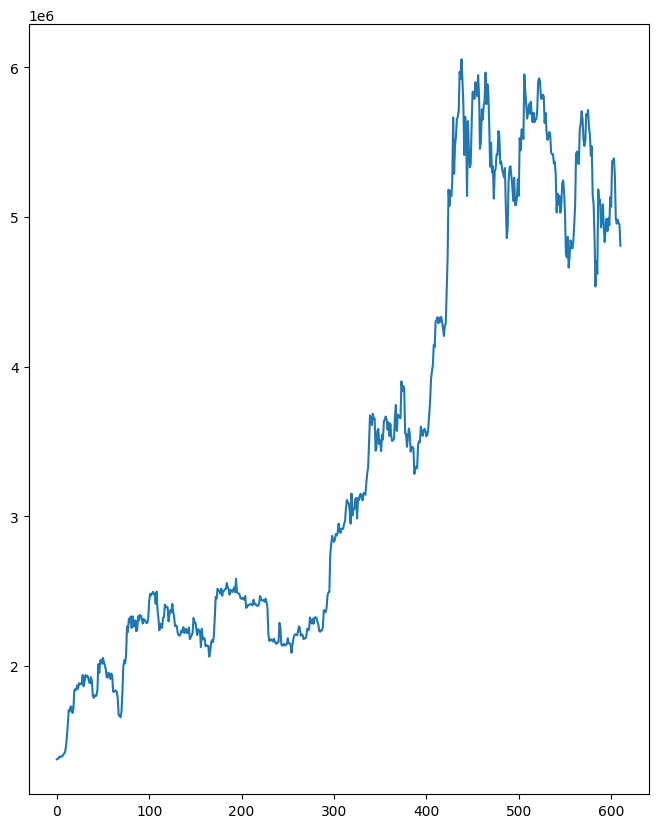

In [7]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [8]:
train_data = data[:-100]
test_data = data[-100:]

In [10]:
train_data.shape

(511, 1)

In [11]:
test_data.shape

(100, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
train_data_scale = scaler.fit_transform(train_data)

In [14]:
base_days = 100

In [15]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [18]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(80, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\anmol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 80)             │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,761 (522.50 KB)

 Trainable params: 133,761 (522.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [22]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - loss: 0.1785
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0367
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0321
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 0.0197
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0207
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0154
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 0.0191
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0115
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.0123
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 0.0174
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0124
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0126
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0106
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0123
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - l

In [23]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [24]:
test_data

,Close
0,4311411.5
1,4330042.5
2,4288767.5
3,4326905.5
4,4298738.5
...,...
195,4954918.5
196,4982391.5
197,4959275.5
198,4946728.5


In [25]:
test_data_scale = scaler.transform(test_data)

In [26]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [27]:
x[0]

array([[0.62755014],
       [0.6315328 ],
       [0.62270965],
       [0.63086222],
       [0.6248411 ],
       [0.63209703],
       [0.62498902],
       [0.61480162],
       [0.60475242],
       [0.61961989],
       [0.62250657],
       [0.67156276],
       [0.71808017],
       [0.81373852],
       [0.79061139],
       [0.81172303],
       [0.80444818],
       [0.82459511],
       [0.91698435],
       [0.83634577],
       [0.87626799],
       [0.88938419],
       [0.91411958],
       [0.91763602],
       [0.92690059],
       [0.98216409],
       [0.97166192],
       [1.        ],
       [0.9721523 ],
       [0.93568762],
       [0.86324073],
       [0.91772676],
       [0.90304238],
       [0.80465308],
       [0.91167561],
       [0.87091553],
       [0.84561184],
       [0.85067679],
       [0.9074919 ],
       [0.95341387],
       [0.95268846],
       [0.94358249],
       [0.96707848],
       [0.95172181],
       [0.94730981],
       [0.97729986],
       [0.94876426],
       [0.872

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [30]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 568ms/step


In [31]:
pred = scaler.inverse_transform(pred)

In [190]:
pred

array([[5039010.5],
       [5075924.5],
       [5110366. ],
       [5141554.5],
       [5168748.5],
       [5191262. ],
       [5208929. ],
       [5221669.5],
       [5229713. ],
       [5233520. ],
       [5233886.5],
       [5232343.5],
       [5230440. ],
       [5229292.5],
       [5229133.5],
       [5229769.5],
       [5230944.5],
       [5232345.5],
       [5233056.5],
       [5232455.5],
       [5229788.5],
       [5224352. ],
       [5215840. ],
       [5204472. ],
       [5190720.5],
       [5174802.5],
       [5156975. ],
       [5137611.5],
       [5116994. ],
       [5095509.5],
       [5073346. ],
       [5049931.5],
       [5025153.5],
       [4999019.5],
       [4971958.5],
       [4944260.5],
       [4916424. ],
       [4889529.5],
       [4864784. ],
       [4843009.5],
       [4824152.5],
       [4806947.5],
       [4789955.5],
       [4772538. ],
       [4753914. ],
       [4733841. ],
       [4712856.5],
       [4691728.5],
       [4671152. ],
       [4651882.5],


In [32]:
#future Bitcoin Price

In [33]:
m = y
z= []
future_days = 15
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m, pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [193]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [194]:
z

array([[4838307.60302265],
       [4839728.25481352],
       [4835535.4499108 ],
       [4826464.19088972],
       [4813427.65431848],
       [4797381.67814393],
       [4779235.2564462 ],
       [4759783.06196404],
       [4739680.35116625],
       [4719434.87810802],
       [4699415.53823967],
       [4679874.95384236],
       [4660969.82880351],
       [4642785.48588035],
       [4625355.38497765]])

In [195]:
model.save('Bitcoin_Price_prediction_Model.keras')